In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyviewshed as pv
from jsim.Util.RasterMap import RasterMap

In [3]:
rmap = RasterMap("/home/jhewers/Documents/GIS/data/Isle of Arran/Scottish Government/Lidar Sco Phase2 1m Arran/5m_arran_b_merged.tif")
n,m = rmap._nd_map.shape
nd_map = rmap._nd_map.astype(np.float32)
viewpoint_elevation = 1.98
target_elevation = 1.7
ew_res = 1
ns_res = 1
max_dist = 1000

In [4]:
viewpoint = pv.Viewpoint(n//2,m//2,viewpoint_elevation,0)
viewpoint

<pyviewshed.Viewpoint(row=2000,col=2500,elev=1.98,target_offset=0)>

In [5]:
cell_head = pv.Cell_head(n,m,ew_res,ns_res,n,m,0,0)
cell_head

<pyviewshed.Cell_head(rows=4000,cols=5000,ew_res=1,ns_res=1,N=4000,E=5000,S=0,W=0)>

In [6]:
gridheader = pv.GridHeader(cell_head.cols, cell_head.rows, cell_head.west, cell_head.south, cell_head.ew_res, cell_head.ns_res, cell_head)
gridheader

<pyviewshed.GridHeader(ncols=5000,nrows=4000,xllcorner=0,yllcorner=0,ew_res=1,ns_res=1)>

In [7]:
viewoptions = pv.ViewOptions(viewpoint.elev, target_elevation, max_dist)
viewoptions

<pyviewshed.ViewOptions(obsElev=1.98,tgtElev=1.70,maxDist=1000.00)>

## Use the viewshed algorithm

In [8]:
%time
result = pv.viewshed_in_to_memory(nd_map, viewpoint, viewoptions, gridheader)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.53 µs


2022-07-12 16:14:34.658 (   1.457s) [        B9AAF740]              grass.cpp:86    INFO| Computing events...
2022-07-12 16:14:53.488 (  20.288s) [        B9AAF740]           viewshed.cpp:232   INFO| Computing visibility...


<IPython.core.display.Javascript object>


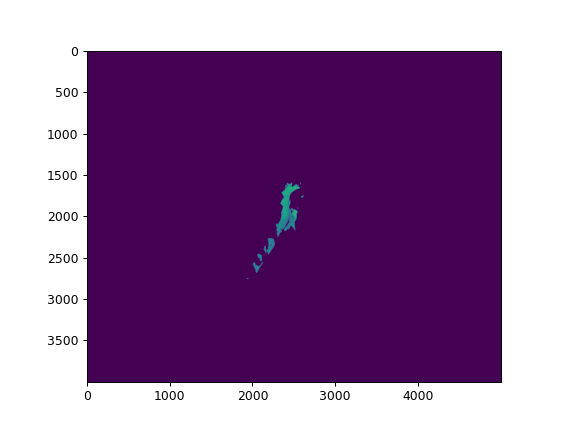

In [9]:
fig,ax = plt.subplots()
ax.imshow(result)
plt.show()

## Visualize visible area

<IPython.core.display.Javascript object>


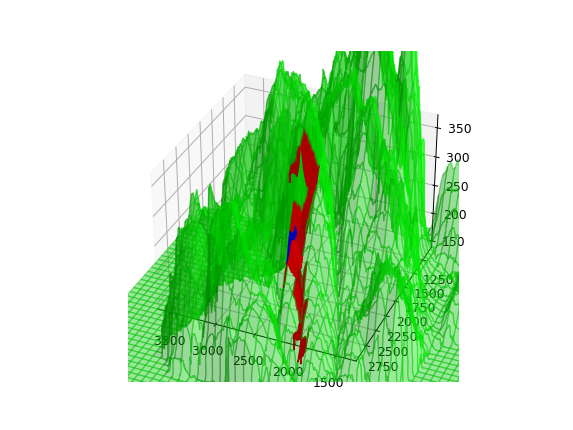

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


facecolors = np.ones((*nd_map.shape,4))
facecolors[:,:,:] = (0,1,0,0.4)
facecolors[result>0,:] = (1,0,0,1)

k = 10
row = viewpoint.row
col = viewpoint.col
facecolors[row-k:row+k+1, col-k:col+k+1,:] = (0,0,1,1)

x,y = np.meshgrid(np.arange(m),np.arange(n))
ax.plot_surface(x,y,nd_map,facecolors=facecolors)
plt.show()